<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/23_treeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 예측, 분류, 순위(랭킹) => 업무 자동화 (의사결정을 기계화, 자동화)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 주어진 차수에 따라 다항 회귀 모델을 생성하는 파이프라인 반환한다.
# 비선형회귀
# 키:데이터 형식으로 입력되는 모든 매개변수
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [9]:
# make_data()로 회귀 분석을 위한 가상 데이터셋 생성
import numpy as np
def make_data(N, err=1.0, rseed=1):   # N : 샘플 개수, err : 잡음의 표준편차, rseed : 난수 시드
  rng = np.random.RandomState(rseed)  # 난수 생성
  X = rng.rand(N, 1) ** 2             # (N, 1) 형태의 무작위 배열 X 생성
  y = 10 - 1. / (X.ravel() + 0.1)     # 종속변수 y 계산 / ravel() : 데이터를 1차원 배열로 변환하는 함수
  if err > 0:
    y += err * rng.randn(N)
  return X, y
X, y = make_data(40)  # 40개의 샘플 데이터셋
print(type(X))

<class 'numpy.ndarray'>


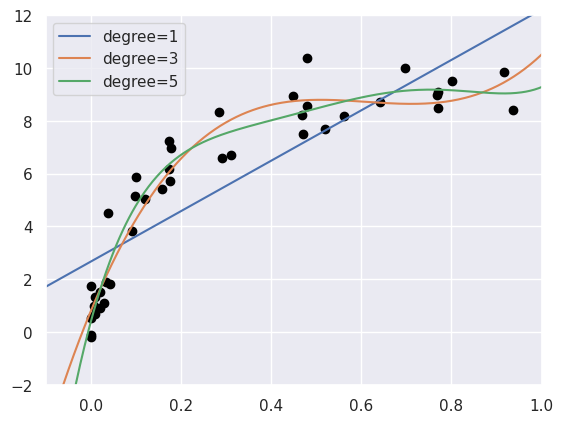

In [10]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
X_test = np.linspace(-0.1, 1.1, 500)[:, None]  # -0.1부터 1.1까지 500개 배열
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:  # degree 변수를 1, 3, 5로 반복
  y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)  # degree로 다항 회귀 모델 생성, X와 y 데이터로 모델 학습후, X_test에 대한 예측값 y_test 계산
  plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))

# x축, y축 범위제한 (xlim, ylim) 
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [23]:
# 다항 회귀 모델의 최적 매개변수를 탐색
# 모든 모델에 적용
# hyper parameter tuning : GridSearchCV  (CV : cross-validation, 교차검증)
from sklearn.model_selection import GridSearchCV

# 파이프라인의 모델의 구성요소에 대한 튜닝(tuning)
# 모델에 파라미터 조합을 만들고, 그 중 최적의 조합을 탐색하고 (데이터는) CV를 이용 
# 2x2x21 = 84개의 파라미터 조합이 생성
# refit = True 조합에 있는 파라미터를 쓰는 것이 아닌 최적의 파라미터를 사용
param_grid = {'polynomialfeatures__degree':np.arange(21),        # 차수 / 0 ~ 20 -> 21개
              'linearregression__fit_intercept':[True, False]}  # 절편 매개변수, 2개
              # 'linearregression__normalize' : [True, False]}       # 정규화 매개변수, 2개

     # GridSearchCV에 입력된 모델은 파이프라인(pipeline)이다.
grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)    # 교차검증 7번 -> 84개의 조합이 7번씩 진행 -> 588번 진행되며 최적의 조합을 탐색

In [24]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [25]:
grid.best_params_  # 최상의 파라미터 조합

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

In [26]:
grid.cv_results_  # 그리드 서치 결과 반환 (dict)

{'mean_fit_time': array([0.00103283, 0.00107179, 0.00104836, 0.00102925, 0.00103392,
        0.00119502, 0.00112036, 0.00126931, 0.00135466, 0.0013408 ,
        0.00117183, 0.00121815, 0.00118218, 0.00173283, 0.00164982,
        0.00148293, 0.00146587, 0.00139638, 0.00129989, 0.00167612,
        0.00130391, 0.00075259, 0.00094254, 0.00098416, 0.0009985 ,
        0.0012532 , 0.00207765, 0.00121638, 0.00140061, 0.00153671,
        0.00190221, 0.00190418, 0.00213531, 0.00203834, 0.00152527,
        0.00222022, 0.0022176 , 0.00137496, 0.00108205, 0.00112448,
        0.00137162, 0.00140388]),
 'std_fit_time': array([3.66851172e-04, 7.65398288e-05, 1.94926810e-05, 2.25881944e-05,
        1.93586730e-05, 1.86537719e-04, 3.92361174e-05, 2.63394820e-04,
        1.45120494e-04, 2.19774001e-04, 2.76547934e-05, 7.99837317e-05,
        5.69417468e-05, 7.71330801e-04, 2.11583001e-04, 3.87785004e-04,
        3.51296874e-04, 9.08702746e-05, 7.40574346e-05, 3.86168552e-04,
        1.31933674e-04, 3.401

In [27]:
grid.cv_results_['mean_test_score']  # 평균값 (평균 검증 성능), 42개 

array([-1.50187129e-01,  6.39753774e-01,  8.62193757e-01,  8.85425576e-01,
        8.97271031e-01,  8.96805045e-01,  8.82212280e-01,  8.84618365e-01,
        8.14681395e-01,  8.85340885e-01, -1.68115162e-01, -3.53640623e+00,
       -6.31933288e+00, -1.00851938e+03, -9.62799816e+02, -7.52062038e+03,
       -4.17017130e+04, -1.38610713e+03, -1.74598673e+08, -5.30520275e+08,
       -1.19808068e+10, -1.50187129e-01,  6.39753774e-01,  8.62193757e-01,
        8.85425576e-01,  8.97271031e-01,  8.96805045e-01,  8.82212280e-01,
        8.84618365e-01,  8.14681395e-01,  8.85340885e-01, -1.68115162e-01,
       -3.53640624e+00, -6.31933315e+00, -1.00851965e+03, -9.62796128e+02,
       -7.52063148e+03, -4.17037438e+04, -1.37960375e+03, -1.73947386e+08,
       -5.15475098e+08, -1.44975758e+09])

In [28]:
grid.best_estimator_  # 최상의 모델 (파이프라인)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [29]:
grid.best_score_  # 약 90%의 조합도 (교차검증 점수)

0.8972710305736532

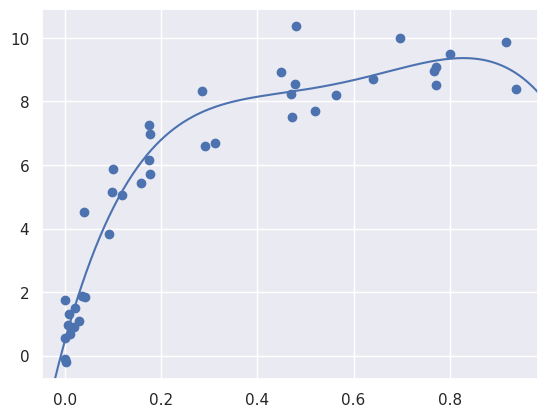

In [31]:
# 최적의 모델에 대해 시각화
model = grid.best_estimator_

# 4차 방정식으로 비선형 회귀 모델을 작성 
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

# 선은 실제 데이터, 점은 예측 데이터
# 예측 시 가장 차이가 적은 데이터가 정확한 데이터 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline  # 전처리 + 모델
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  # 표준 정규화
from sklearn.svm import SVC  # support vector classifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

winedf = pd.read_csv('/content/drive/MyDrive/winequality-red.csv', sep=';')
print(winedf.head(3))
X = winedf.drop(["quality"],axis=1)  # 'quality' 열을 제외한 나머지 열을 독립 변수로 설정
Y = winedf['quality']  # 종속변수 (5개)

# dafault parameter
# SVM은 kernel(커널) -> linear 커널, rbf 커널(방사형, 디폴트)
# C(규제)와 gamma(초평면(커널)의 모양을 결정)
# 모양을 결정한다는 것은? ML 중 고차원을 좋아하는 모델 : SVM
# 커널을 이용하여 데이터를 고차원으로 보냄 : XOR 문제를 고차원으로 해결 (차원 확대하여 공간을 확보 후 나눔), 신경망 XOR (layer 추가)

steps = [('scaler', StandardScaler()), ('SVM', SVC())]
# 파이프라인에서 이름으로 참조하기 위해, 따로 이름을 부여 (steps)
pipeline = Pipeline(steps)  # 클래스 인스턴스
parameters = {'SVM__C':[0.001, 0.1, 10, 100, 10e5], 'SVM__gamma':[0.1, 0.01]}

# 데이터 훈련(train) 세트, 데이터 테스트(test) 세트
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,          # test_size = 0.2 : 테스트 세트의 비율을 20%로 설정
                                                    random_state = 30, stratify=Y)  # stratify = Y : 레이블 기반 층화 추출(분류) 클래스별로 test 데이터 추출
grid = GridSearchCV(pipeline, param_grid = parameters, cv = 5)  # 5번의 교차 검증
grid.fit(X_train, y_train)
print("score = %3.2f" % (grid.score(X_test, y_test)))  # 67%
print(grid.best_params_)  # {'SVM__C': 10, 'SVM__gamma': 0.1}

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
score = 0.67
{'SVM__C': 10, 'SVM__gamma': 0.1}


In [48]:
grid.best_score_  # 0.6207659313725491 (교차검증 점수)

0.6207659313725491

In [49]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC(C=10, gamma=0.1))])

In [50]:
# 트리 분석을 위한 패키지 설치
!apt-get -qq install -y graphviz && pip install -q pydot

In [ ]:
!apt-get install graphviz libgraphviz-dev pkg-config

In [ ]:
!pip install pygraphviz

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(random_state = 0)  # Decision Tree
iris = load_iris()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, '\n  (

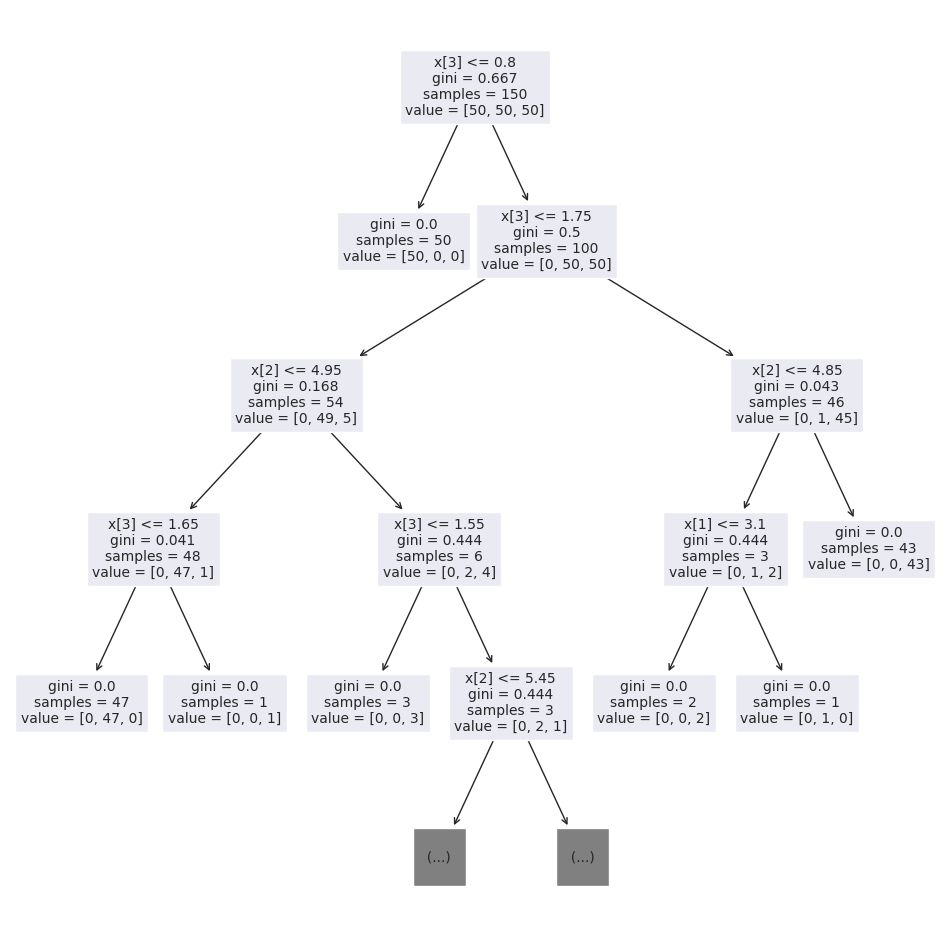

In [56]:
fig, ax = plt.subplots(figsize = (12, 12))
clf = clf.fit(iris.data, iris.target)  # iris.data : 독립변수, iris.target : 종속 변수, fit() : 모델 학습
tree.plot_tree(clf, max_depth = 4, fontsize = 10)  # 결정 트리 시각화, max_depth : 트리의 최대 깊이를 제한

In [57]:
cross_val_score(clf, iris.data, iris.target, cv=10)  # iris.data는 독립변수, iris.target은 종속변수, 교차검증 10번

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [58]:
clf.get_params()  # clf 모델 매개변수들의 종류

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [59]:
clf.get_depth()  # clf의 결정 트리 모델 최대깊이

5

In [62]:
# 문제
import pandas as pd
data = pd.DataFrame(iris.data)
print(data.head())
clf.predict(data.iloc[0:150, :])  # 150개 행 선택

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
# 위 데이터에 대해 accuracy (정분류율) 출력
clf.score(data, iris.target)  # 예측할 데이터와 실제 값

1.0

In [65]:
import pandas as pd
data = pd.DataFrame(iris.data)
print(data.head())
pred = clf.predict(data.iloc[0:150, :])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [66]:
from sklearn.metrics import accuracy_score  # 일반화 함수 
accuracy_score(pred, iris.target[0:150])    # 예측값과 실제 값 

1.0

In [67]:
# colab에서 matplotlib 한글화할 때 
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size':18, 'font.family':'NanumGothic'})

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122675 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [68]:
from sklearn.datasets import make_classification
X, y = make_classification(1000)  #  1000개 샘플을 가진 가상 분류용 데이터셋 생성
print(type(X))  # 'numpy.ndarray'
X.shape  

<class 'numpy.ndarray'>


(1000, 20)

In [74]:
# X, 레이블 y 기반으로 랜덤 포레스트 분류모델 훈련, 훈련 데이터에 대한 정확도(accuracy) 출력
# DT(Dicision Tree) -> 단점 : 과적합, 특성 순서에 영향, 노이즈(noise)에 민감함
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, y)  # 데이터 X와 레이블 y 훈련
print("Accuracy:\t", (y == rf.predict(X)).mean())  # 배열의 평균 계산

Accuracy:	 1.0


# 변수 선택법 (noise 역할)
- feature_selection : Select_Best, rfe
- tree model의 변수 중요도
- PCA (주성분 분석)

Text(0.5, 1.0, '특성중요도')

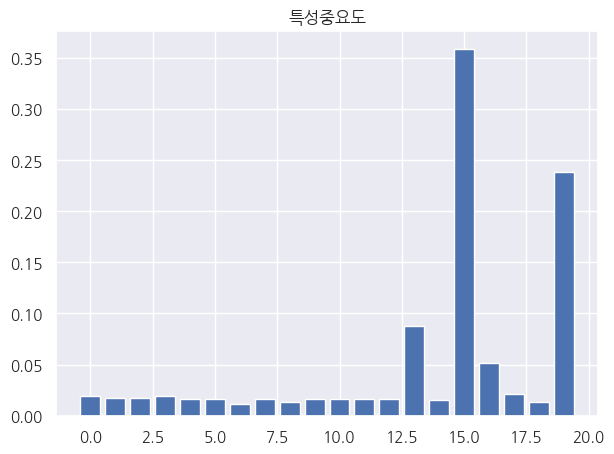

In [71]:
# 특성중요도 시각화
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(0, len(rf.feature_importances_)), rf.feature_importances_)  # feature_importances_ : 변수(특성) 중요도
ax.set_title("특성중요도")

In [72]:
# 랜덤 포레스트 모델
# sqrt(전체 변수) -> 20개의 변수 추출  # 변수의 순서
# boosting : 데이터를 여러개의 조합으로 만들어 모델을 생성
print("종속변수 개수", rf.n_classes_)
print("클래스 종류", rf.classes_)  # [0 1]
print("특성 수", rf.n_features_in_)
print("모델", rf.estimators_)

종속변수 개수 2
클래스 종류 [0 1]
특성 수 20
모델 [DecisionTreeClassifier(max_features='sqrt', random_state=365264400), DecisionTreeClassifier(max_features='sqrt', random_state=1132515695), DecisionTreeClassifier(max_features='sqrt', random_state=1154136790), DecisionTreeClassifier(max_features='sqrt', random_state=974958798), DecisionTreeClassifier(max_features='sqrt', random_state=1631421732), DecisionTreeClassifier(max_features='sqrt', random_state=174288822), DecisionTreeClassifier(max_features='sqrt', random_state=1243340411), DecisionTreeClassifier(max_features='sqrt', random_state=282600220), DecisionTreeClassifier(max_features='sqrt', random_state=974036270), DecisionTreeClassifier(max_features='sqrt', random_state=428158922), DecisionTreeClassifier(max_features='sqrt', random_state=1089809451), DecisionTreeClassifier(max_features='sqrt', random_state=1416507399), DecisionTreeClassifier(max_features='sqrt', random_state=1886978848), DecisionTreeClassifier(max_features='sqrt', random_state=1038

In [ ]:
# 문제
# boston 데이터 로딩 후, RandomForestRegressor로 모델을 구성하고 변수중요도 시각화하기

In [83]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
title = ['RM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
         'B', 'LSTAT', 'medv']
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(type(data))
boston_df = pd.DataFrame(data, columns=title)
boston_df.head(16)

<class 'numpy.ndarray'>


,RM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [89]:
from sklearn.ensemble import RandomForestRegressor
X = boston_df.iloc[:, :12]  # 독립변수
print(X.shape)  # 506, 12
y = boston_df.iloc[:, 12]   # 종속변수
print(y.shape)  # 506

(506, 12)
(506,)


In [90]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()  # DicisionTreeRegressor가 기본이다.
rf.fit(X, y)

RandomForestRegressor()

In [92]:
rf.feature_importances_  # 각 변수에 대한 변수중요도

array([0.11242074, 0.00165289, 0.18598973, 0.00395298, 0.06736032,
       0.2670992 , 0.18631528, 0.08743346, 0.00432268, 0.01819564,
       0.01707559, 0.04818149])

In [93]:
sorted(map(lambda x: round(x, 2), rf.feature_importances_))

[0.0, 0.0, 0.0, 0.02, 0.02, 0.05, 0.07, 0.09, 0.11, 0.19, 0.19, 0.27]

In [94]:
sorted(zip(map(lambda x: round(x, 2), rf.feature_importances_), title), reverse=True)  # 변수중요도가 높은 변수에서 낮은 변수로 내림차순 정렬

[(0.27, 'RM'),
 (0.19, 'INDUS'),
 (0.19, 'AGE'),
 (0.11, 'RM'),
 (0.09, 'RAD'),
 (0.07, 'NOX'),
 (0.05, 'LSTAT'),
 (0.02, 'PTRATIO'),
 (0.02, 'B'),
 (0.0, 'ZN'),
 (0.0, 'TAX'),
 (0.0, 'CHAS')]

Text(0.5, 1.0, 'feature_importances_')

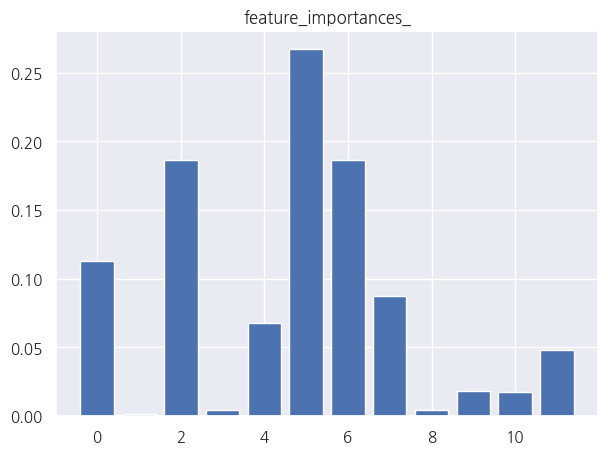

In [95]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(0, len(rf.feature_importances_)), rf.feature_importances_)
ax.set_title("feature_importances_")

<Axes: >

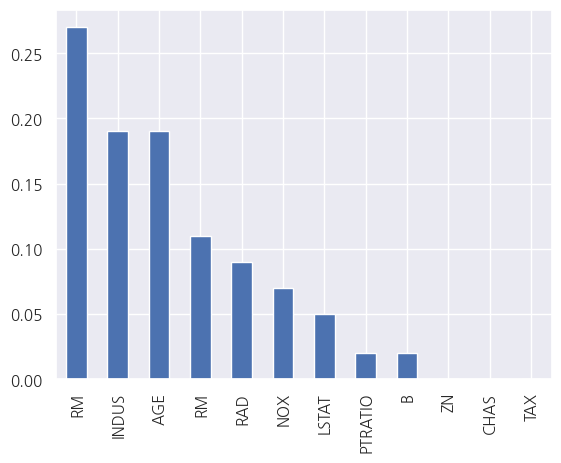

In [98]:
import pandas as pd
res = pd.Series(map(lambda x: round(x, 2), rf.feature_importances_), index = title[:12])
res = res.sort_values(ascending=False)  # 내림차순 (큰 수 -> 작은 수)
res.plot(kind='bar')  # 'bar' 종류 시각화

In [104]:
# 회귀 모델의 성능을 평가하는 다양한 함수
# 평균제곱 오차, 평균절대 오차, R제곱, 분산 설명도, 최대 오차
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error

In [101]:
rf.score(X, y)  # 입력 변수 X와 실제 타겟 변수 y를 사용하여 모델의 R2(R제곱) 점수 (1에 가까울 수록 좋은 모델이다)

0.9589090927714918

In [105]:
pred = rf.predict(X)
mean_squared_error(y, pred)  # 타겟 변수 y와 모델의 예측 값 pred 사이의 평균 제곱 오차
                             # MSE는 예측 값과 실제 값 사이의 차이를 제곱한 후 평균한 값

2.091279784031623

In [106]:
mean_absolute_error(y, rf.predict(X))  # 실제 타겟 변수 y와 모델의 예측 값 rf.predict(X) 사이의 평균 절대 오차
                                       # MAE는 예측 값과 실제 값 사이의 절대값을 평균한 값

0.9508750988142288

# Bagging
- ensemble (앙상블 학습) (모델 여러개로 조화로운 학습)
- Bootstrapping (부트스트래핑)
- RandomForest(DT 이용)
- bagging = bootstrapping + aggregation(집계)
  - 열의 조합으로 다양한 데이터를 생성
  - 이유 : 특성 선택에 따른 다양한 결과
  - 가장 좋은 데이터는, 모든 경우의 수가 있는 데이터
  - 평균(연속적 데이터), 투표(다수결의 원칙(이산적 데이터))
  - 다양한 모델을 base에 선택할 수 있음
# AdaBoost : Adaptive 적응적으로 - 점차적으로 변환 : 잘못된 분류에 대해 가중치 조절
# Gradient Boost : 신경망에 경사하강법 처럼, 예측치와 실제값의 오차를 점차로 줄여서 Robust한 모델을 생성
# XGBoost : GB에다 GPU 추가, 고유 데이터포맷을 이용하여 데이터 처리
# lightGBM : 속도가 빠름 -> 변수의 중요도를 고려하여 중요한 변수만을 압축, 실시간으로 데이터를 빠르게 처리해야 하는 경우 사용

In [107]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Accuracy =", accuracy_score(y_test, y_pred_tree))  # 약 85 %

Accuracy = 0.856


In [109]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state = 42), n_estimators = 500,
    max_samples = 100, bootstrap = True, n_jobs = -1, random_state = 42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print("Accuracy =", accuracy_score(y_test, y_pred))  # 약 90 %

Accuracy = 0.904


In [111]:
# BaggingClassifier를 사용하여 SVM을 기본 분류기로 사용하는 배깅 앙상블 모델 생성, 데이터[[0, 0, 0, 0]]의 예측 수행
# support vector machine
from sklearn.svm import SVC
X, y = make_classification(n_samples = 100, n_features = 4,
                             n_informative = 2, n_redundant = 0,
                             random_state = 0, shuffle = False)
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators = 10, random_state = 0).fit(X, y)  # 기본 분류기 개수 : 10개
clf.predict([[0, 0, 0, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([1])

In [116]:
# 문제 
# 위 데이터에 대해 SVC를 베이스로 accuracy를 출력
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy =", accuracy)

Accuracy = 0.912


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [117]:
# 문제
# base가 DecisionTreeClassifier인 BaggingClassifier에
# DT의 max_depth [3, 4, 5, 6]으로 파라미터 튜닝 (GridSearchCV) 실시 
param_grid = {
    'estimator__max_depth':[3, 4, 5, 6],
    'max_samples':[0.01, 0.05, 0.1, 0.2]
}
# 직접 모델을 GridSearchCV에 입력한 경우
clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state = 42),
                n_estimators = 10, max_samples = 100, bootstrap = True, n_jobs = -1,
                random_state = 42, max_features = 0.5), param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         max_features=0.5, max_samples=100,
                                         n_jobs=-1, random_state=42),
             param_grid={'estimator__max_depth': [3, 4, 5, 6],
                         'max_samples': [0.01, 0.05, 0.1, 0.2]})

In [118]:
clf.best_params_

{'estimator__max_depth': 3, 'max_samples': 0.05}

In [119]:
model = {'model':BaggingClassifier,
         'kwargs':{'estimator':DecisionTreeClassifier()},
         'parameters':
              {
                  'name__estimator__max_depth' : [3, 4, 5, 6],
                  'name__estimator__max_leaf_nodes' : [10, 20, 30]
              }}
pipeline = Pipeline([('name', model['model'](**model['kwargs']))])
cv_model = GridSearchCV(pipeline, param_grid = model['parameters'], cv = 5)
cv_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('name',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={'name__estimator__max_depth': [3, 4, 5, 6],
                         'name__estimator__max_leaf_nodes': [10, 20, 30]})

In [121]:
cv_model.best_params_

{'name__estimator__max_depth': 5, 'name__estimator__max_leaf_nodes': 20}

In [122]:
# 분류기의 결정 경계를 시각화
from matplotlib.colors import ListedColormap
# 모델이 들어옴 : 예측을 하겠다는 것, y값이 결정
# 도화사이즈를 제약
# alpha : 투명도, 겹쳐서 출력될 수 있다.
# contour : 등고선(같은 높이는 같은 색으로)
def plot_decision_boundary(clf, X, y, axes = [-1.5, 2.5, -1, 1.5], alpha = 0.5,
                           contour = True):
  x1s = np.linspace(axes[0], axes[1], 100)  # axes로 지정된 범위에 대해 100개의 점을 생성하여 x1과 x2를 만들기
  x2s = np.linspace(axes[2], axes[3], 100)  # 100x100
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]     # 이후 np.c_ 함수를 사용하여 x1과 x2를 합친 후 X_new 정의
  y_pred = clf.predict(X_new).reshape(x1.shape)  # X_new의 예측값 계산

  custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap)

  if contour:
    custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
    plt.contour(x1, x2, y_pred, cmap = custom_cmap2, alpha = 0.8)

  plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", alpha = alpha)
  plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", alpha = alpha)  # plt.plot() : 입력 데이터 X를 산점도로 플롯(plot)
  plt.axis(axes)  # x, y축 범위 설정 
  plt.xlabel(r"$x_1$", fontsize = 18)
  plt.ylabel(r"$x_2$", fontsize = 18, rotation = 0)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


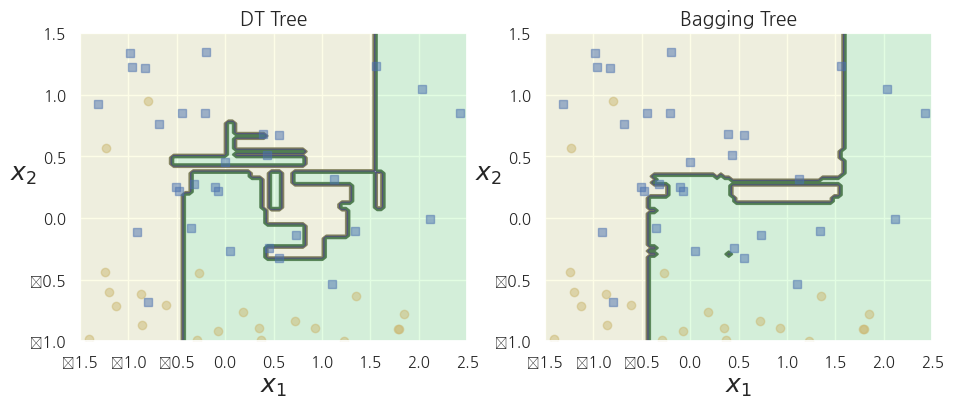

In [124]:
# DT와 배깅 분류기의 결정 경계 시각화
plt.figure(figsize = (11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title('DT Tree', fontsize = 14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title('Bagging Tree', fontsize = 14)
plt.show()